In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [4]:
data = pd.read_excel('C:/Users/Administrator/Downloads/Python_files_material/Excelr assignments/Clustering/EastWestAirlines.xlsx', sheet_name = 'data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
data = data.rename({'ID#':'ID','Award?':'Award'}, axis = 1)
data.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
def check_int(df):
    count = 0
    for row in df:
        try:
            if type(row) != int:
                df.loc[count] = np.nan
        except:
            pass
        count +=1

In [8]:
check_int(data[data.columns])

In [9]:
data.isna().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,3999.0,2014.819455,1160.764358,1.0,1010.5,2016.0,3020.5,4021.0
Balance,3999.0,73601.327582,100775.664958,0.0,18527.5,43097.0,92404.0,1704838.0
Qual_miles,3999.0,144.114529,773.663804,0.0,0.0,0.0,0.0,11148.0
cc1_miles,3999.0,2.059515,1.376919,1.0,1.0,1.0,3.0,5.0
cc2_miles,3999.0,1.014504,0.147650,1.0,1.0,1.0,1.0,3.0
cc3_miles,3999.0,1.012253,0.195241,1.0,1.0,1.0,1.0,5.0
Bonus_miles,3999.0,17144.846212,24150.967826,0.0,1250.0,7171.0,23800.5,263685.0
Bonus_trans,3999.0,11.601900,9.603810,0.0,3.0,12.0,17.0,86.0
Flight_miles_12mo,3999.0,460.055764,1400.209171,0.0,0.0,0.0,311.0,30817.0
Flight_trans_12,3999.0,1.373593,3.793172,0.0,0.0,0.0,1.0,53.0


In [11]:
data1 = data.drop('ID', axis =1)
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [13]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [14]:
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[0.01650773 0.         0.         ... 0.         0.84374246 0.        ]
 [0.01128788 0.         0.         ... 0.         0.83988425 0.        ]
 [0.02425685 0.         0.         ... 0.         0.84784181 0.        ]
 ...
 [0.0431695  0.         0.5        ... 0.         0.16879672 1.        ]
 [0.03220189 0.         0.         ... 0.01886792 0.16867615 0.        ]
 [0.00176908 0.         0.         ... 0.         0.16831444 0.        ]]


[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.862

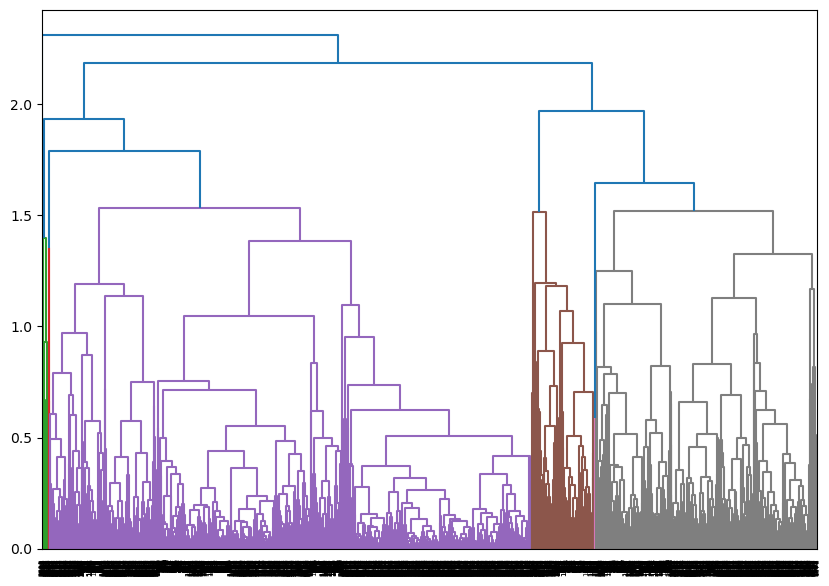

In [15]:
plt.figure(figsize = (10,7))
dendograms = sch.dendrogram(sch.linkage(scaler1_df,'complete'))

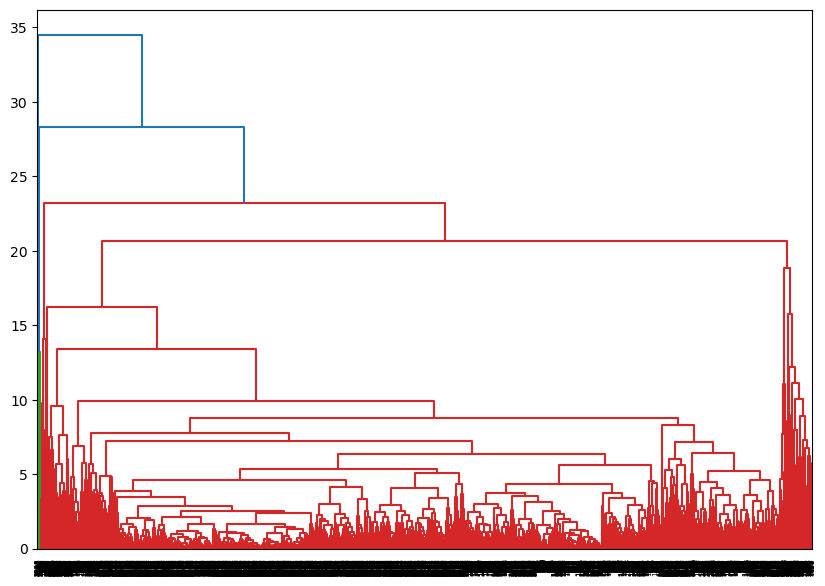

In [16]:
plt.figure(figsize = (10,7))
dendograms = sch.dendrogram(sch.linkage(scaler2_df,'complete'))

In [17]:
H_clusters = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
H_clusters

AgglomerativeClustering(n_clusters=5)

In [18]:
y = pd.DataFrame(H_clusters.fit_predict(scaler1_df),columns=['clustersid'])
y['clustersid'].value_counts()

1    1011
0     946
2     808
4     699
3     535
Name: clustersid, dtype: int64

In [19]:
y

,clustersid
0,1
1,1
2,1
3,1
4,3
...,...
3994,0
3995,0
3996,0
3997,4


In [20]:
data['clustersid_s1']=H_clusters.labels_
data

data1['clustersid_s1']=H_clusters.labels_

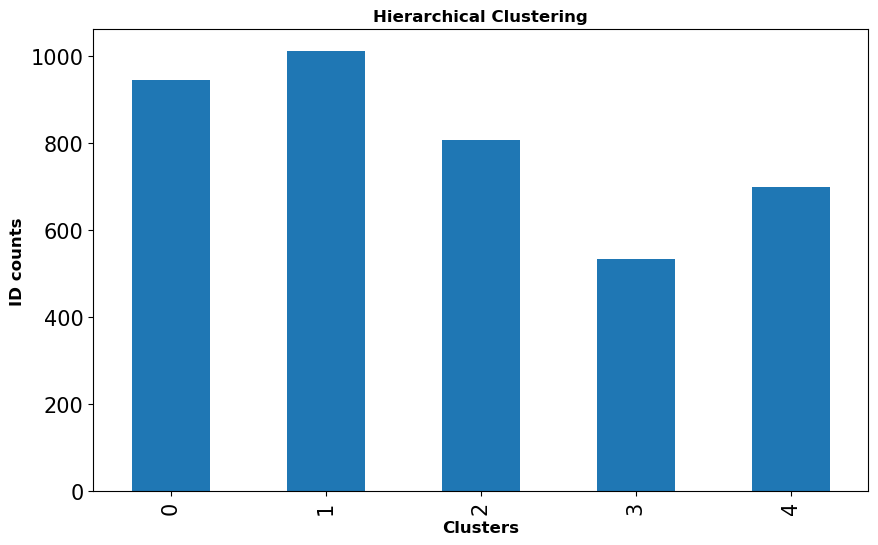

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clustersid_s1']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [22]:
data1.groupby('clustersid_s1').agg(['mean']).reset_index()

,clustersid_s1,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


In [23]:
from sklearn.metrics import silhouette_score
sil_score= silhouette_score(scaler1_df, H_clusters.labels_)
sil_score

0.3762586351398372

In [24]:
from sklearn.cluster import KMeans

In [25]:
scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [26]:
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [27]:
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

print('\n')

scaler2_df = scaler2.fit_transform(data1)
print(scaler2_df)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ...  1.39545434e+00
  -7.66919299e-01 -5.39219215e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ...  1.37995704e+00
  -7.66919299e-01 -5.39219215e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ...  1.41192021e+00
  -7.66919299e-01 -5.39219215e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -1.31560393e+00
   1.30391816e+00 -1.25111675e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -1.31608822e+00
  -7.66919299e-01  1.59647340e+00]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -1.31754109e+00
  -7.66919299e-01  1.59647340e+00]]


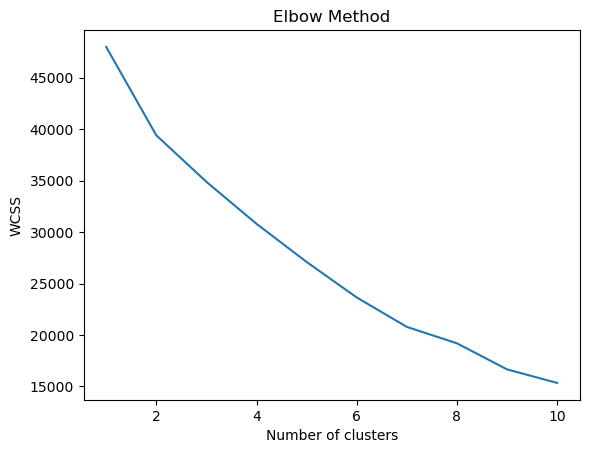

In [39]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler1_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
clusters_new1 = KMeans(5, random_state=42)
clusters_new1.fit(scaler1_df)

sil_score= silhouette_score(scaler1_df, clusters_new1.labels_)
print('Silhouette Score for data normalized by MinMaxScaler: ',sil_score)


clusters_new2 = KMeans(5, random_state=42)
clusters_new2.fit(scaler2_df)

sil_score= silhouette_score(scaler2_df, clusters_new2.labels_)
print('Silhouette Score for data normalized by StandardScaler: ',sil_score)

Silhouette Score for data normalized by MinMaxScaler:  0.26027860826355964
Silhouette Score for data normalized by StandardScaler:  0.32490482900380546


In [41]:
data['clusterid_Kmeans'] = clusters_new1.labels_
data1['clusterid_Kmeans'] = clusters_new1.labels_

In [42]:
y=pd.DataFrame(clusters_new1.fit_predict(scaler1_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

1    2089
4     926
2     826
0     143
3      15
Name: clusterid_Kmeans, dtype: int64

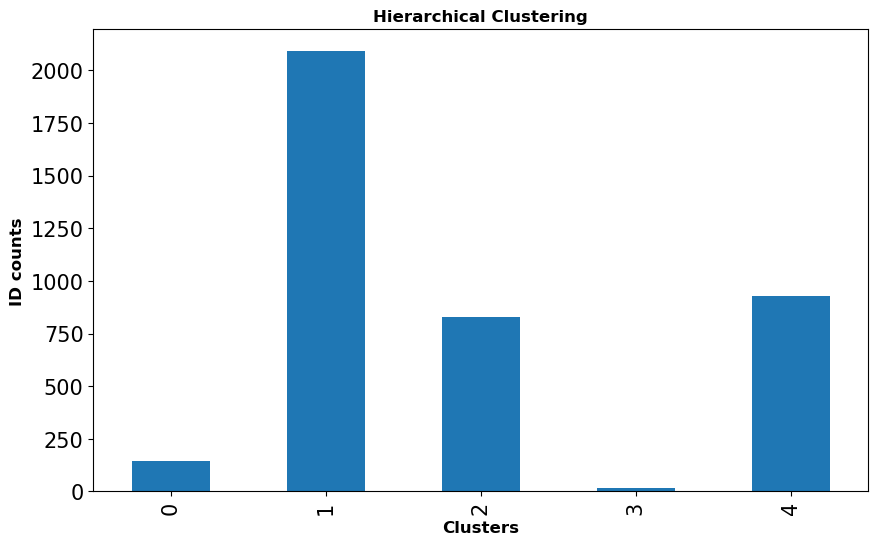

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['clusterid_Kmeans']).count()['ID'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [44]:
data1.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

,clusterid_Kmeans,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,clustersid_s1
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,199030.979021,849.832168,2.230769,1.041958,1.000000,33945.524476,28.839161,5668.335664,16.874126,4773.853147,0.853147,1.559441
1,1,53220.451891,105.881762,1.451412,1.023935,1.000479,7005.680708,8.409765,242.638583,0.742461,4708.946865,0.391096,0.733844
2,2,33669.486683,118.060533,1.268765,1.000000,1.000000,4617.880145,7.244552,190.398305,0.523002,1597.100484,0.000000,3.651332
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,2.533333
4,4,134784.922246,145.681425,4.087473,1.002160,1.002160,47354.077754,19.761339,386.015119,1.158747,4926.625270,0.576674,2.395248


In [53]:
from sklearn.cluster import DBSCAN

In [54]:
scaler1_df = scaler1.fit_transform(data1)
print(scaler1_df)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01 -6.94658544e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01 -6.94658544e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
  -5.39219215e-01 -6.94658544e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ...  1.30391816e+00
  -1.25111675e+00 -6.94658544e-01]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
   1.59647340e+00  1.01084658e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -7.66919299e-01
   1.59647340e+00  1.01084658e-01]]


In [55]:
dbscan = DBSCAN(eps = 0.4, min_samples = 6)
dbscan.fit(scaler1_df)
dbscan.labels_

array([ 0,  0,  0, ..., -1, 12, 12], dtype=int64)

In [56]:
y=pd.DataFrame(dbscan.fit_predict(scaler1_df),columns=['clusterid_DBSCAN'])
y['clusterid_DBSCAN'].value_counts()

-1     1920
 0      777
 12     567
 1      188
 5      114
 4      111
 17      59
 10      51
 19      34
 15      33
 2       23
 14      16
 18      15
 9       13
 11      13
 8       12
 20       8
 13       6
 3        6
 6        6
 7        6
 22       6
 23       6
 16       5
 21       4
Name: clusterid_DBSCAN, dtype: int64

In [57]:
sil_score= silhouette_score(scaler1_df, dbscan.labels_)
sil_score

-0.10377595188822196